In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [12]:
df=pd.read_csv('TSLA.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-04-01,2020-04-01,100.800003,102.790001,95.019997,96.311996,96.311996,66766000
2020-04-02,2020-04-02,96.206001,98.851997,89.279999,90.893997,90.893997,99292000
2020-04-03,2020-04-03,101.900002,103.098000,93.678001,96.001999,96.001999,22562100
2020-04-06,2020-04-06,102.239998,104.199997,99.592003,103.248001,103.248001,14901800
2020-04-07,2020-04-07,109.000000,113.000000,106.468002,109.089996,109.089996,17919800
...,...,...,...,...,...,...,...
2021-01-05,2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
2021-01-06,2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000
2021-01-07,2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900
2021-01-08,2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500


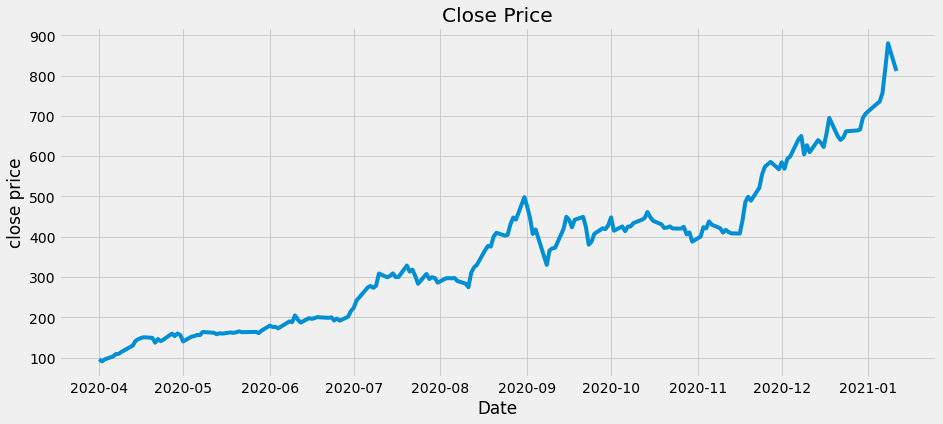

In [13]:
plt.figure(figsize=(14,6))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('close price')
plt.show()

In [14]:
#calculate short/fast moving average
ShortEMA=df.Close.ewm(span=10,adjust=False).mean()
#calculate middle/medium exponential moving average
MiddleEMA=df.Close.ewm(span=50,adjust=False).mean()
#calculate long/slow exponential moving average
LongEMA=df.Close.ewm(span=100,adjust=False).mean()

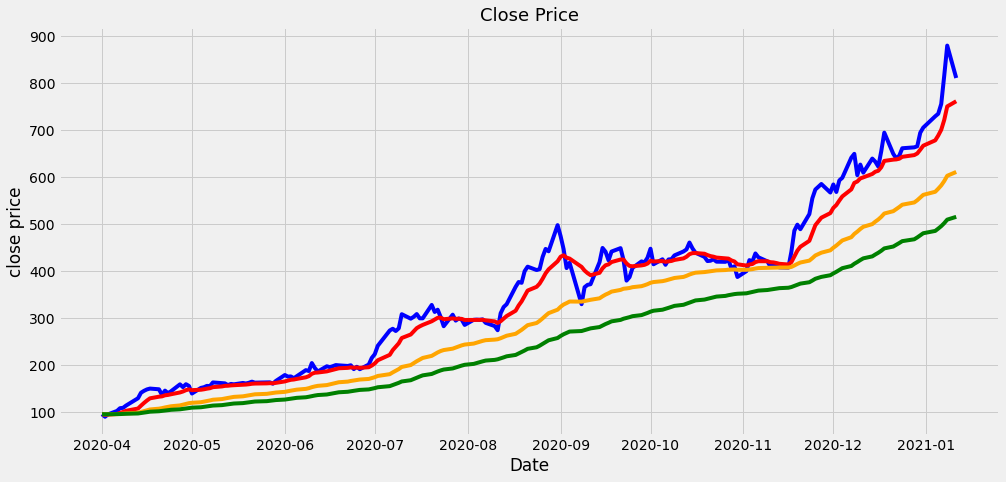

In [32]:
plt.figure(figsize=(15,7))
plt.title('Close Price',fontsize=18)
plt.plot(df['Close'],label='Close Price',color='blue')
plt.plot(ShortEMA,label='short EMA',color='red')
plt.plot(MiddleEMA,label='middle EMA',color='orange')
plt.plot(LongEMA,label='long EMA',color='green')
plt.xlabel('Date')
plt.ylabel('close price')
plt.show()

In [16]:
df['Short']=ShortEMA
df['Middle']=MiddleEMA
df['Long']=LongEMA

In [17]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long
2020-04-01,2020-04-01,100.800003,102.790001,95.019997,96.311996,96.311996,66766000,96.311996,96.311996,96.311996
2020-04-02,2020-04-02,96.206001,98.851997,89.279999,90.893997,90.893997,99292000,95.326905,96.099525,96.204709
2020-04-03,2020-04-03,101.900002,103.098000,93.678001,96.001999,96.001999,22562100,95.449650,96.095701,96.200695
2020-04-06,2020-04-06,102.239998,104.199997,99.592003,103.248001,103.248001,14901800,96.867532,96.376183,96.340245
2020-04-07,2020-04-07,109.000000,113.000000,106.468002,109.089996,109.089996,17919800,99.089798,96.874764,96.592716
...,...,...,...,...,...,...,...,...,...,...
2021-01-05,2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200,688.863522,575.741749,490.938404
2021-01-06,2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000,701.066514,582.809915,496.186752
2021-01-07,2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900,721.970780,591.956192,502.520479
2021-01-08,2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500,750.707006,603.252813,509.995718


In [21]:
def buy_sell_functon(data):
    
    buy_list= []
    sell_list= []
    flag_long = False
    flag_short= False
    
    for i in range(0,len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long==False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short=True
        elif flag_short== True and data['Short'][i]> data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short=False
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long==False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short=True
        elif flag_long== True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short=False
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        
    return (buy_list,sell_list)
            

In [23]:
df['Buy'] = buy_sell_functon(df)[0]
df['Sell'] = buy_sell_functon(df)[1]

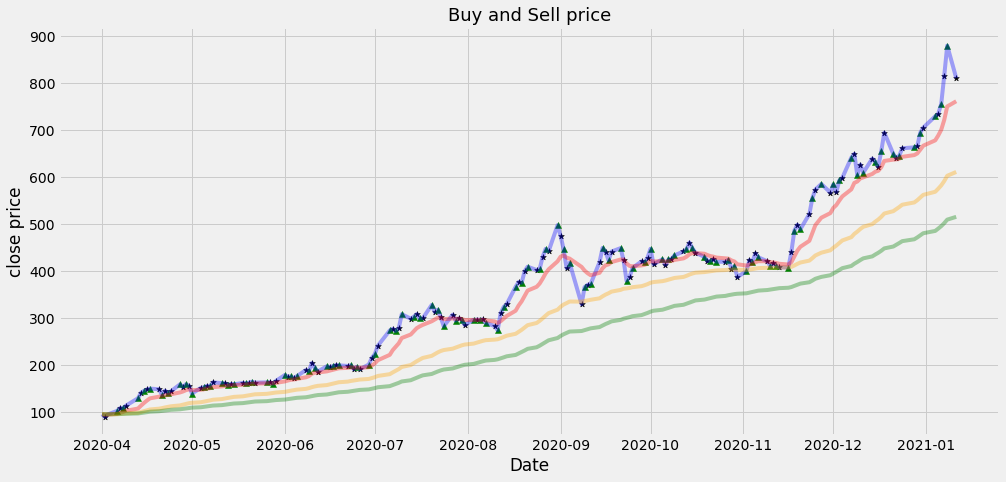

In [34]:
plt.figure(figsize=(15,7))
plt.title('Buy and Sell price',fontsize=18)
plt.plot(df['Close'],label='Close Price',color='blue',alpha=0.35)
plt.plot(ShortEMA,label='short EMA',color='red',alpha=0.35)
plt.plot(MiddleEMA,label='middle EMA',color='orange',alpha=0.35)
plt.plot(LongEMA,label='long EMA',color='green',alpha=0.35)
plt.scatter(df.index, df['Buy'],color='black', marker='*',alpha=1 )
plt.scatter(df.index, df['Sell'],color='green', marker='^',alpha=1 )
plt.xlabel('Date')
plt.ylabel('close price')
plt.show()

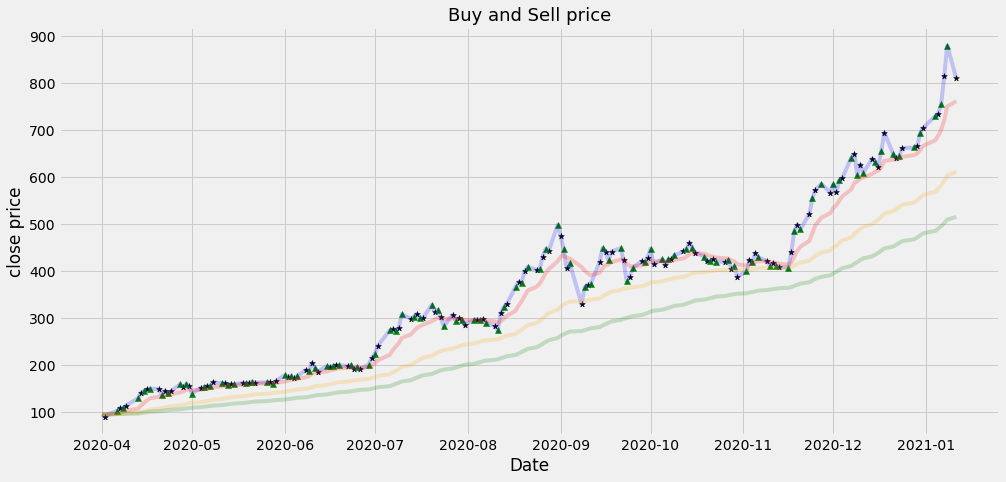

In [38]:
plt.figure(figsize=(15,7))
plt.title('Buy and Sell price',fontsize=18)
plt.plot(df['Close'],label='Close Price',color='blue',alpha=0.20)
plt.plot(ShortEMA,label='short EMA',color='red',alpha=0.20)
plt.plot(MiddleEMA,label='middle EMA',color='orange',alpha=0.20)
plt.plot(LongEMA,label='long EMA',color='green',alpha=0.20)
plt.scatter(df.index, df['Buy'],color='black', marker='*',alpha=1 )
plt.scatter(df.index, df['Sell'],color='green', marker='^',alpha=1 )
plt.xlabel('Date')
plt.ylabel('close price')
plt.show()